In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [7]:
import requests
# Import the API key.
from config import weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | corrales
Processing Record 3 of Set 1 | zaragoza
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | dingle
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | te anau
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | arman
Processing Record 14 of Set 1 | kloulklubed
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | vila
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | rathdrum
Processing Record 20 of Set 1 | sungaipenuh
Processing Record 21 of Set 1 | provideniya
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 1 | petropavlovsk-ka

Processing Record 38 of Set 4 | yumen
Processing Record 39 of Set 4 | kroya
Processing Record 40 of Set 4 | saint-pacome
City not found. Skipping...
Processing Record 41 of Set 4 | san policarpo
Processing Record 42 of Set 4 | port shepstone
Processing Record 43 of Set 4 | iqaluit
Processing Record 44 of Set 4 | daoukro
Processing Record 45 of Set 4 | rio gallegos
Processing Record 46 of Set 4 | mglin
Processing Record 47 of Set 4 | dryden
Processing Record 48 of Set 4 | westport
Processing Record 49 of Set 4 | yamada
Processing Record 50 of Set 4 | petauke
Processing Record 1 of Set 5 | kungurtug
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | conceicao do araguaia
Processing Record 4 of Set 5 | bay roberts
Processing Record 5 of Set 5 | ballstad
City not found. Skipping...
Processing Record 6 of Set 5 | lubaczow
Processing Record 7 of Set 5 | beloha
Processing Record 8 of Set 5 | mamlyutka
Processing Record 9 of Set 5 | college
Processing Record 10 of Set 5 | elm

Processing Record 26 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 27 of Set 8 | chagda
City not found. Skipping...
Processing Record 28 of Set 8 | nara
Processing Record 29 of Set 8 | ancud
Processing Record 30 of Set 8 | hihifo
City not found. Skipping...
Processing Record 31 of Set 8 | kimbe
Processing Record 32 of Set 8 | paamiut
Processing Record 33 of Set 8 | najran
Processing Record 34 of Set 8 | jiroft
City not found. Skipping...
Processing Record 35 of Set 8 | ugoofaaru
Processing Record 36 of Set 8 | salalah
Processing Record 37 of Set 8 | umm lajj
Processing Record 38 of Set 8 | mitu
Processing Record 39 of Set 8 | marawi
Processing Record 40 of Set 8 | rio cuarto
Processing Record 41 of Set 8 | olafsvik
Processing Record 42 of Set 8 | vilyuysk
Processing Record 43 of Set 8 | avera
Processing Record 44 of Set 8 | coihaique
Processing Record 45 of Set 8 | belgrade
Processing Record 46 of Set 8 | ambon
Processing Record 47 of Set 8 | vestmannaeyjar
Proc

Processing Record 14 of Set 12 | hudiksvall
Processing Record 15 of Set 12 | port blair
Processing Record 16 of Set 12 | anyama
Processing Record 17 of Set 12 | albion
Processing Record 18 of Set 12 | bondo
Processing Record 19 of Set 12 | dillon
Processing Record 20 of Set 12 | mendoza
Processing Record 21 of Set 12 | moroto
Processing Record 22 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 23 of Set 12 | tabarqah
City not found. Skipping...
Processing Record 24 of Set 12 | udachnyy
Processing Record 25 of Set 12 | gushikawa
Processing Record 26 of Set 12 | tanout
Processing Record 27 of Set 12 | juliaca
Processing Record 28 of Set 12 | shimoda
Processing Record 29 of Set 12 | kruisfontein
Processing Record 30 of Set 12 | seymchan
Processing Record 31 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 32 of Set 12 | goulburn
Processing Record 33 of Set 12 | saint-pierre
Processing Record 34 of Set 12 | sao felix do xingu
Processing Record 35 o

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,59.00,47,40,16.11,AR,2021-01-20 17:38:02
1,Corrales,35.2378,-106.6067,34.00,82,97,3.98,US,2021-01-20 17:39:12
2,Zaragoza,41.6561,-0.8773,46.00,93,75,9.22,ES,2021-01-20 17:36:35
3,Rikitea,-23.1203,-134.9692,78.10,75,25,15.17,PF,2021-01-20 17:39:12
4,Airai,-8.9266,125.4092,61.59,100,83,2.62,TL,2021-01-20 17:39:12
5,Dingle,10.9995,122.6711,75.24,92,98,4.00,PH,2021-01-20 17:39:12
6,Busselton,-33.6500,115.3333,66.00,86,1,1.99,AU,2021-01-20 17:39:12
7,Nikolskoye,59.7035,30.7861,15.80,86,90,2.24,RU,2021-01-20 17:39:12
8,Puerto Ayora,-0.7393,-90.3518,82.40,69,20,23.02,EC,2021-01-20 17:39:12
9,Te Anau,-45.4167,167.7167,47.71,88,100,3.47,NZ,2021-01-20 17:39:13


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-01-20 17:38:02,-54.8000,-68.3000,59.00,47,40,16.11
1,Corrales,US,2021-01-20 17:39:12,35.2378,-106.6067,34.00,82,97,3.98
2,Zaragoza,ES,2021-01-20 17:36:35,41.6561,-0.8773,46.00,93,75,9.22
3,Rikitea,PF,2021-01-20 17:39:12,-23.1203,-134.9692,78.10,75,25,15.17
4,Airai,TL,2021-01-20 17:39:12,-8.9266,125.4092,61.59,100,83,2.62
5,Dingle,PH,2021-01-20 17:39:12,10.9995,122.6711,75.24,92,98,4.00
6,Busselton,AU,2021-01-20 17:39:12,-33.6500,115.3333,66.00,86,1,1.99
7,Nikolskoye,RU,2021-01-20 17:39:12,59.7035,30.7861,15.80,86,90,2.24
8,Puerto Ayora,EC,2021-01-20 17:39:12,-0.7393,-90.3518,82.40,69,20,23.02
9,Te Anau,NZ,2021-01-20 17:39:13,-45.4167,167.7167,47.71,88,100,3.47


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


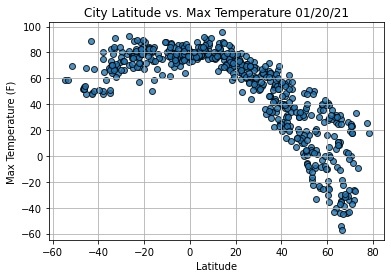

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

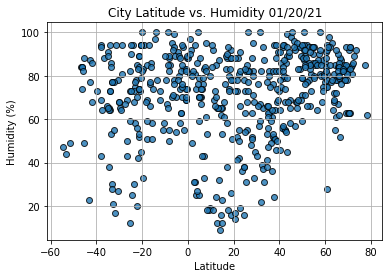

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

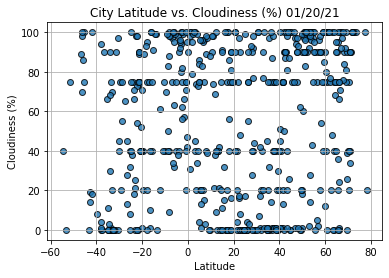

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

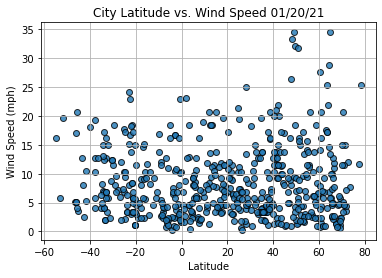

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [19]:
index13 = city_data_df.loc[13]
index13

City                  Kloulklubed
Country                        PW
Date          2021-01-20 17:39:13
Lat                        7.0419
Lng                       134.256
Max Temp                     80.6
Humidity                       83
Cloudiness                     75
Wind Speed                   5.75
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
539     True
540    False
541    False
542     True
543     True
Name: Lat, Length: 544, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Corrales,US,2021-01-20 17:39:12,35.2378,-106.6067,34.00,82,97,3.98
2,Zaragoza,ES,2021-01-20 17:36:35,41.6561,-0.8773,46.00,93,75,9.22
5,Dingle,PH,2021-01-20 17:39:12,10.9995,122.6711,75.24,92,98,4.00
7,Nikolskoye,RU,2021-01-20 17:39:12,59.7035,30.7861,15.80,86,90,2.24
11,Barrow,US,2021-01-20 17:39:13,71.2906,-156.7887,-5.80,84,90,14.97


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

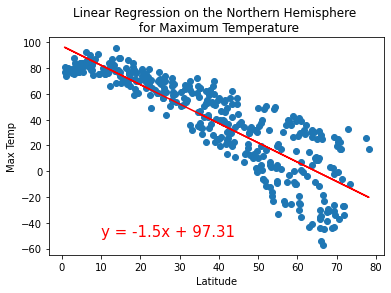

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-50))

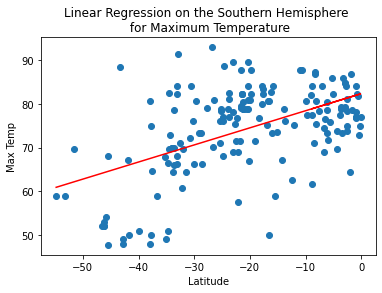

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-30,45))

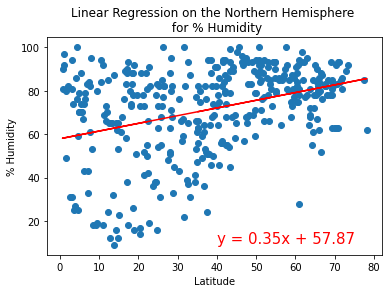

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(40,10))

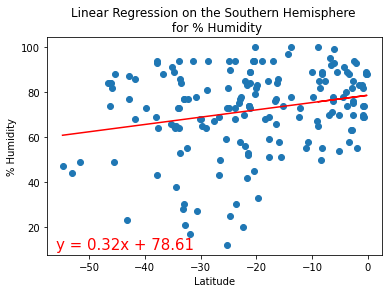

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-56,10))

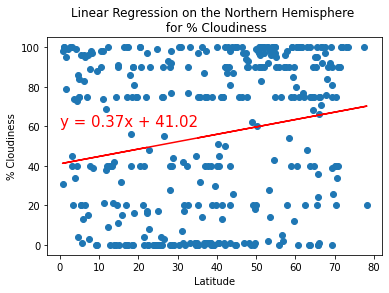

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(0,60))

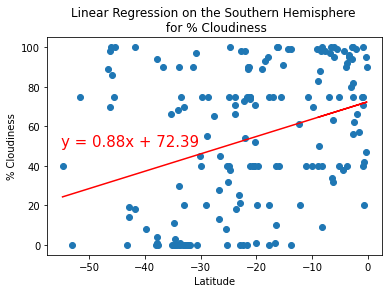

In [41]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-55,50))

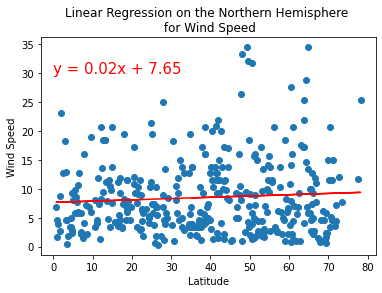

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(0,30))

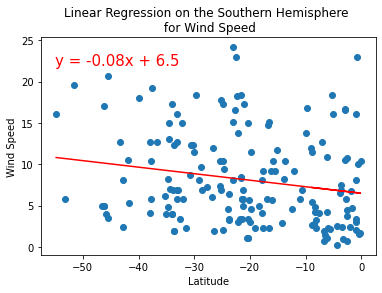

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-55,22))

In [50]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

ImportError: cannot import name 'g_key' from 'config' (C:\Users\rwhited\Desktop\Classwork\World_Weather_Analysis\config.py)